# Q11 (Part 1)

In [47]:
import pandas as pd
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
node_coordinates_df = pd.read_csv('mean_location_coordinates.txt', sep = "\t",header = None)
node_coordinates_df.columns = ['nodeID','Lon', 'Lat']

In [35]:
# Create the node list we need using the node list file
new_node_df = pd.read_csv('new_node.txt', header = None)
new_node_df.columns = ['nodeID']

In [36]:
index_list = []
for index, row in node_coordinates_df.iterrows():
    if not (new_node_df['nodeID'] == row['nodeID']).any():
        index_list.append(index)

node_coordinates_df.drop(node_coordinates_df.index[index_list], inplace=True)

In [37]:
coordinate_matrix = node_coordinates_df.as_matrix(columns = ['Lon','Lat'])

In [51]:
node_coordinates_df.to_csv('mean_location_coords_new.txt', sep = "\t", header = False, index = False)

In [39]:
tri = Delaunay(coordinate_matrix)

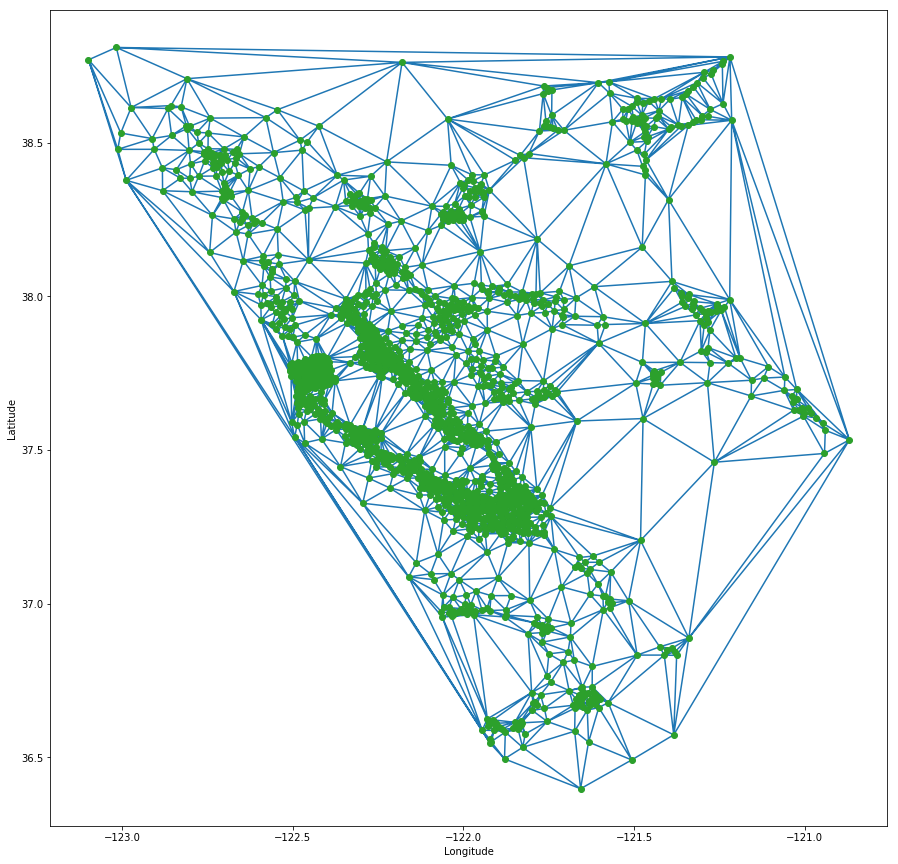

In [40]:
plt.figure(figsize=(15,15))
plt.triplot(coordinate_matrix[:,0], coordinate_matrix[:,1], tri.simplices.copy())
plt.plot(coordinate_matrix[:,0], coordinate_matrix[:,1], 'o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Method 1 for calculating edges

In [41]:
(indices, indptr) = tri.vertex_neighbor_vertices

In [42]:
edge_list = []
for i in range(len(coordinate_matrix)):
    neighs = indptr[indices[i]:indices[i+1]]
    for neigh in neighs:
        if neigh > i:
            edge_list.append([node_coordinates_df.iloc[i,0], node_coordinates_df.iloc[neigh,0]])
len(edge_list)

5627

In [23]:
# Write edgelist into file
with open('triangulated_edge_list.txt','w') as f:
    for sdw in edge_list:
        f.write('%d\t%d\n'%(sdw[0],sdw[1]))

# Method 2 for calculating edges (most common approach)

In [52]:
#dictionary from coordinate matrix to node number
coord_to_node = {}
for index, row in node_coordinates_df.iterrows():
    lon_lat_tup = (int(round(row['Lon'] * 1000000)),int(round(row['Lat']*1000000)))
    nodeID = row['nodeID']
    coord_to_node[lon_lat_tup] = nodeID


In [53]:
edge_list_tri = set()
for simplex in tri.simplices:
    e1 = tuple(sorted([node_coordinates_df.iloc[simplex[0],0],node_coordinates_df.iloc[simplex[1],0]]))
    e2 = tuple(sorted([node_coordinates_df.iloc[simplex[1],0],node_coordinates_df.iloc[simplex[2],0]]))
    e3 = tuple(sorted([node_coordinates_df.iloc[simplex[0],0],node_coordinates_df.iloc[simplex[2],0]]))
    edge_list_tri.add(e1)
    edge_list_tri.add(e2)
    edge_list_tri.add(e3)
    
print(len(edge_list_tri))

5627
